In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
file = '/content/drive/MyDrive/Colab Notebooks/DROWSINESS.zip'

In [3]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

drive  Drowsy_datset  sample_data


In [4]:
from pathlib import Path
data = Path(r'/content/Drowsy_datset/train')

In [5]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [6]:
images[:20]

['/content/Drowsy_datset/train/NATURAL/v0070.png',
 '/content/Drowsy_datset/train/NATURAL/151.png',
 '/content/Drowsy_datset/train/NATURAL/2223.jpg_0.png',
 '/content/Drowsy_datset/train/NATURAL/u0257.png',
 '/content/Drowsy_datset/train/NATURAL/1309.png',
 '/content/Drowsy_datset/train/NATURAL/a0391.png',
 '/content/Drowsy_datset/train/NATURAL/a0381.png',
 '/content/Drowsy_datset/train/NATURAL/1030.jpg_0.png',
 '/content/Drowsy_datset/train/NATURAL/561.png',
 '/content/Drowsy_datset/train/NATURAL/q0356.png',
 '/content/Drowsy_datset/train/NATURAL/156.png',
 '/content/Drowsy_datset/train/NATURAL/2228.jpg_0.png',
 '/content/Drowsy_datset/train/NATURAL/558.png',
 '/content/Drowsy_datset/train/NATURAL/v0101.png',
 '/content/Drowsy_datset/train/NATURAL/1009.jpg_0.png',
 '/content/Drowsy_datset/train/NATURAL/1061.png',
 '/content/Drowsy_datset/train/NATURAL/950.png',
 '/content/Drowsy_datset/train/NATURAL/1148.png',
 '/content/Drowsy_datset/train/NATURAL/o0136.png',
 '/content/Drowsy_datset

In [7]:
len(images)

5859

In [8]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [9]:
class_values[:10]

['NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL',
 'NATURAL']

In [10]:
len(class_values)

5859

In [11]:
import random # Import the random module at the beginning of the cell
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [12]:
data

,image_path,Class_label
0,/content/Drowsy_datset/train/NATURAL/d0480.png,NATURAL
1,/content/Drowsy_datset/train/DROWSY/1314.png,DROWSY
2,/content/Drowsy_datset/train/NATURAL/n0838.png,NATURAL
3,/content/Drowsy_datset/train/DROWSY/1032.png,DROWSY
4,/content/Drowsy_datset/train/NATURAL/d0095.png,NATURAL
...,...,...
5854,/content/Drowsy_datset/train/DROWSY/1749.png,DROWSY
5855,/content/Drowsy_datset/train/NATURAL/1250.png,NATURAL
5856,/content/Drowsy_datset/train/NATURAL/1464.jpg_...,NATURAL
5857,/content/Drowsy_datset/train/NATURAL/588.png,NATURAL


In [13]:
data.shape

(5859, 2)

In [14]:
data.Class_label.value_counts()

,count
Class_label,
NATURAL,3050
DROWSY,2809


In [15]:
df = data

In [16]:
import os
from PIL import Image

In [17]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [18]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [19]:
images

[array([[[141, 141, 141],
         [141, 141, 141],
         [141, 141, 141],
         ...,
         [137, 137, 137],
         [137, 137, 137],
         [137, 137, 137]],
 
        [[141, 141, 141],
         [141, 141, 141],
         [141, 141, 141],
         ...,
         [137, 137, 137],
         [137, 137, 137],
         [137, 137, 137]],
 
        [[141, 141, 141],
         [141, 141, 141],
         [141, 141, 141],
         ...,
         [137, 137, 137],
         [137, 137, 137],
         [137, 137, 137]],
 
        ...,
 
        [[ 18,  18,  18],
         [ 24,  24,  24],
         [ 37,  37,  37],
         ...,
         [117, 117, 117],
         [117, 117, 117],
         [117, 117, 117]],
 
        [[ 17,  17,  17],
         [ 23,  23,  23],
         [ 36,  36,  36],
         ...,
         [118, 118, 118],
         [118, 118, 118],
         [118, 118, 118]],
 
        [[ 16,  16,  16],
         [ 23,  23,  23],
         [ 36,  36,  36],
         ...,
         [118, 118, 118],
  

In [20]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [21]:
num_classes

2

In [22]:
# save the class into class_names
class_names = list(data['Class_label'])

In [23]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'NATURAL')

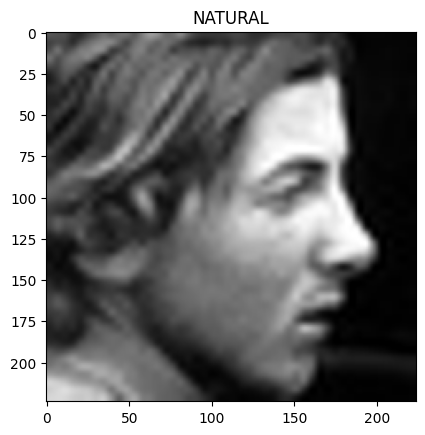

In [24]:
#See the image with class label
plt.imshow(images[20])
plt.title(class_names[20])

Text(0.5, 1.0, 'DROWSY')

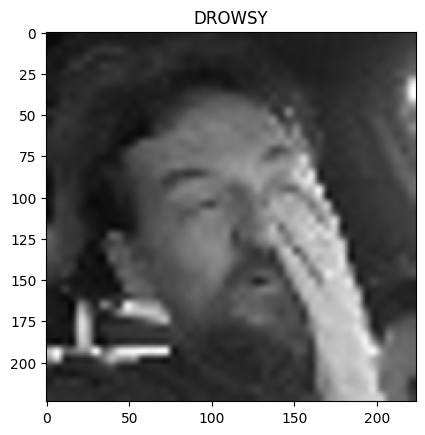

In [25]:
#See the image with class label
plt.imshow(images[250])
plt.title(class_names[250])

In [26]:
# Convert the images into array
images =  np.array(images)

In [27]:
# Shape of the images
images.shape

(5859, 224, 224, 3)

In [28]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(df['Class_label'])
from keras.utils  import to_categorical
y = to_categorical(Y)

In [29]:
enc.classes_

array(['DROWSY', 'NATURAL'], dtype=object)

In [30]:
y[:10]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [31]:
y.shape

(5859, 2)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [33]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Loading data
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32, shuffle=True
)
valid_generator = test_datagen.flow(
    X_test, y_test, batch_size=32, shuffle=False
)

# Compute class weights to handle imbalance
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train_classes), y=y_train_classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights: ", class_weights)

# Loading the MobileNet model
mobilenet_base = MobileNet(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)

# Adding custom layers
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation="softmax")(x)  # 2 classes

model = Model(inputs=mobilenet_base.input, outputs=predictions)

# Freeze base model layers to train only the custom layers initially
for layer in mobilenet_base.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks
early_stop = EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=4, min_lr=1e-6
)

# Train the model
#history = model.fit(
 #   train_generator,
 #   validation_data=valid_generator,
 #   epochs=20,
  #  class_weight=class_weights,
   # callbacks=[early_stop, reduce_lr],
#)

# Fine-tuning: Unfreeze all layers and retrain
for layer in mobilenet_base.layers:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_fine = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=5,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
)


Class Weights:  {0: np.float64(1.0429806714140386), 1: np.float64(0.9604215456674473)}
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 102s 548ms/step - accuracy: 0.5926 - loss: 0.7620 - val_accuracy: 0.7804 - val_loss: 0.4795 - learning_rate: 1.0000e-05
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 56s 435ms/step - accuracy: 0.8349 - loss: 0.3740 - val_accuracy: 0.8527 - val_loss: 0.3483 - learning_rate: 1.0000e-05
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 55s 429ms/step - accuracy: 0.8800 - loss: 0.2891 - val_accuracy: 0.8549 - val_loss: 0.3551 - learning_rate: 1.0000e-05
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 81s 422ms/step - accuracy: 0.9048 - loss: 0.2247 - val_accuracy: 0.8942 - val_loss: 0.2525 - learning_rate: 1.0000e-05
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 56s 429ms/step - accuracy: 0.9137 - loss: 0.2050 - val_accuracy: 0.9414 - val_loss: 0.1396 - learning_rate: 1.0000e-05


In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9350 - loss: 0.1437
Validation Accuracy: 94.14%


In [35]:
model.save('mobilenet.h5')

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=enc.classes_))  # Use enc.classes_ for class names

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step
Classification Report:
              precision    recall  f1-score   support

      DROWSY       0.96      0.92      0.94       843
     NATURAL       0.93      0.96      0.94       915

    accuracy                           0.94      1758
   macro avg       0.94      0.94      0.94      1758
weighted avg       0.94      0.94      0.94      1758



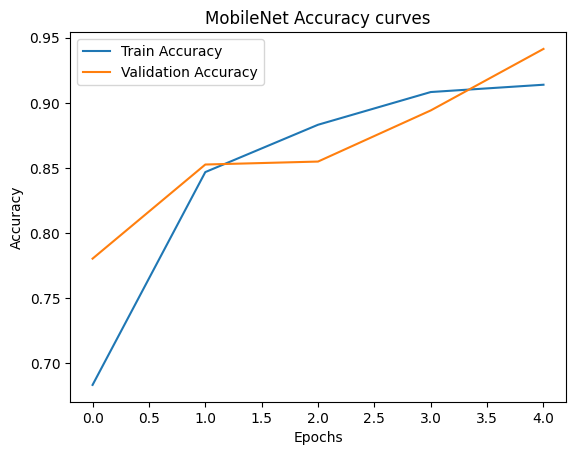

In [37]:
# Plot training and validation accuracy
plt.plot(history_fine.history["accuracy"], label="Train Accuracy")
plt.plot(history_fine.history["val_accuracy"], label="Validation Accuracy")
plt.title("MobileNet Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

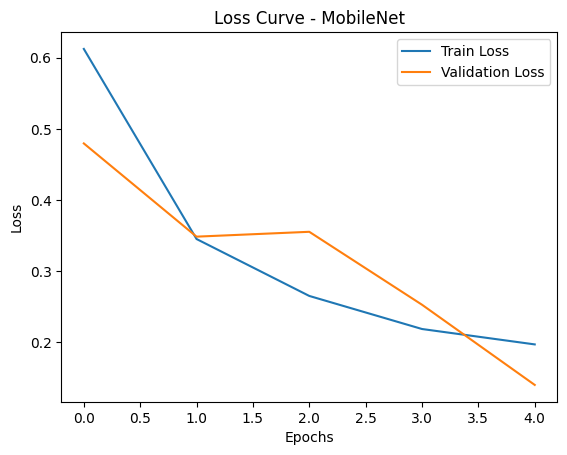

In [38]:
# Loss Plot
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


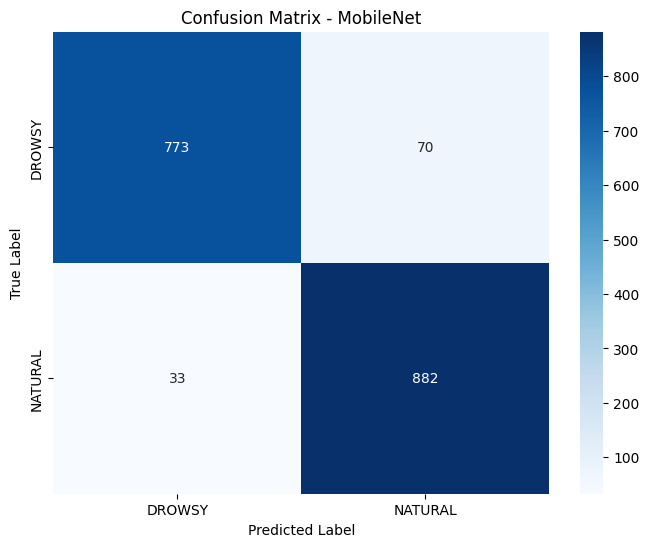

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=enc.classes_,  # Use enc.classes_ for class names
    yticklabels=enc.classes_,  # Use enc.classes_ for class names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNet")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: NATURAL
Actual class: NATURAL


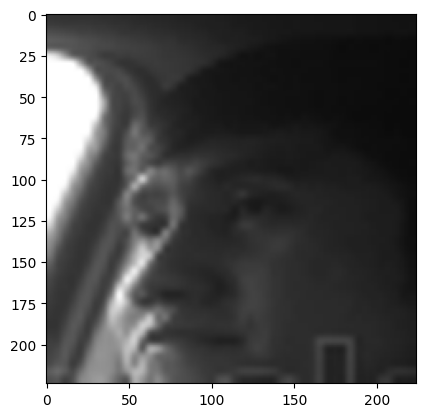

In [42]:
i = 1
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])